In [1]:
#!/usr/bin/python3

import matplotlib.pyplot as plt
import numpy as np
# line cyclers adapted to colourblind people
from cycler import cycler
import mplcyberpunk
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["solid", "--", "-.", ":",(0, (3, 5, 1, 5, 1, 5)), "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

plt.rc("axes", prop_cycle=line_cycler)
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=200)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=10, markeredgewidth=2.5)


In [2]:
import matlab.engine
eng = matlab.engine.connect_matlab()

In [3]:
time = eng.workspace['time'];

cout1 =  np.asarray(eng.workspace['cout1'])
cout2 =  np.asarray(eng.workspace['cout2'])
cout3 =  np.asarray(eng.workspace['cout3'])
cout4 =  np.asarray(eng.workspace['cout4'])

uout1 =  np.asarray(eng.workspace['uout1']);
uout2 =  np.asarray(eng.workspace['uout2']);
uout3 =  np.asarray(eng.workspace['uout3']);
uout4 =  np.asarray(eng.workspace['uout4']);

Error using matlab.internal.engine.getVariable (line 27)
Undefined variable 'time'.



MatlabExecutionError: 
  File /usr/local/MATLAB/R2021a/toolbox/matlab/external/engines/engine_api/+matlab/+internal/+engine/getVariable.m, line 27, in getVariable
Undefined variable 'time'.


In [ ]:
import matplotlib.pyplot as plt
time = np.linspace(0 , time[-1], cout1.size);
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc("axes", prop_cycle=standard_cycler);
plt.rc('figure', figsize=(12, 9));
# plt.style.use('seaborn')
# plt.xkcd()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.supxlabel("Zaman[s]");
fig.supylabel("Çıkış Gerilimi");

ax1.plot(time, uout1, label='Denetleyici Kapalı', linewidth=1.5, alpha=1);
ax1.plot(time, cout1, label='Denetleyici Açık', linewidth=1.5);
ax1.grid();
ax1.legend();
ax1.set_xlim(time[0], time[-1]);
ax1.set_title('Ajan 1')


ax2.plot(time, uout2, label='Denetleyici Kapalı', linewidth=1.5, alpha=1);
ax2.plot(time, cout2, label='Denetleyici Açık', linewidth=1.5);
ax2.grid();
ax2.legend();
ax2.set_xlim(time[0], time[-1]);
ax2.set_title('Ajan 2')

ax3.plot(time, uout3, label='Denetleyici Kapalı', linewidth=1.5, alpha=1);
ax3.plot(time, cout3, label='Denetleyici Açık', linewidth=1.5);
ax3.grid();
ax3.legend();
ax3.set_xlim(time[0], time[-1]);
ax3.set_title('Ajan 3')


ax4.plot(time.reshape(time.size), uout4.reshape(uout4.size), label='Denetleyici Kapalı', linewidth=1.5, alpha=1);
ax4.plot(time.reshape(time.size), cout4.reshape(cout4.size), label='Denetleyici Açık', linewidth=1.5);
ax4.grid();
ax4.legend();
ax4.set_xlim(time[0], time[-1]);
ax4.set_title('Ajan 4')
plt.savefig('deneme.pdf')

In [ ]:
plt.style.available[:15]

In [ ]:
time = np.linspace(0 , time[-1], cout1.size);
obserror1 =  np.asarray(eng.workspace['obserror1']);
obserror2 =  np.asarray(eng.workspace['obserror2']);
obserror3 =  np.asarray(eng.workspace['obserror3']);
obserror4 =  np.asarray(eng.workspace['obserror4']);

plt.rc("axes", prop_cycle=standard_cycler);
plt.rc('figure', figsize=(12, 9));
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False)
fig.supxlabel("Zaman[s]");
fig.supylabel("Durum Kestirim Hatası");

ax1.plot(time, obserror1, linewidth=1);
ax1.grid();
ax4.set_xlim(time[0], time[time.size//2]);
ax1.set_title('Ajan 1')


ax2.plot(time, obserror2, linewidth=1);
ax2.grid();
ax4.set_xlim(time[0], time[time.size//2]);
ax2.set_title('Ajan 2')

ax3.plot(time, obserror3, linewidth=1);
ax3.grid();
ax4.set_xlim(time[0], time[time.size//2]);
ax3.set_title('Ajan 3')


ax4.plot(time, obserror4, linewidth=1);
ax4.grid();
ax4.set_xlim(time[0], 50);
ax4.set_title('Ajan 4')
# plt.savefig('esnek_lokal_error.pdf')

NameError: name 'cout1' is not defined

In [ ]:
dist = eng.workspace['dist'];
time = eng.workspace['time'];
time = np.linspace(0 , time[-1], time.size[0]);
plt.rc("axes", prop_cycle=standard_cycler);
plt.rc('figure', figsize=(12,9));
plt.figure();
plt.plot(time[0:dist.size[0]//5], dist[0:dist.size[0]//5], label="Gürültü İşareti");
plt.legend();
plt.grid();
plt.xlabel("Zaman[s]");
plt.xlim(time[0], time[dist.size[0]//5]);
plt.ylabel("Gerilim");
plt.savefig('disturbance.pdf')


In [ ]:
time = np.linspace(0 , time[-1], cout1.size);

plt.rc("axes", prop_cycle=line_cycler);
plt.rc('figure', figsize=(12, 9));
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False)
fig.supxlabel("Zaman[s]");
fig.supylabel("Çıkış Gerilimi");

ax1.plot(time, uout1, linewidth=1);
ax1.grid();
ax1.set_title('Ajan 1')


ax2.plot(time, uout2, linewidth=1);
ax2.grid();
ax2.set_title('Ajan 2')

ax3.plot(time, uout3, linewidth=1);
ax3.grid();
ax3.set_title('Ajan 3')


ax4.plot(time, uout4, linewidth=1);
ax4.grid();
ax4.set_xlim(time[0], 100);
ax4.set_title('Ajan 4')
# plt.savefig('esnek-all-open.pdf')

In [ ]:
time = eng.workspace['time'];

cout1 =  np.asarray(eng.workspace['cout1'])
cout2 =  np.asarray(eng.workspace['cout2'])
cout3 =  np.asarray(eng.workspace['cout3'])
cout4 =  np.asarray(eng.workspace['cout4'])

acout1 =  np.asarray(eng.workspace['acout1'])
acout2 =  np.asarray(eng.workspace['acout2'])
acout3 =  np.asarray(eng.workspace['acout3'])
acout4 =  np.asarray(eng.workspace['acout4'])

bcout1 =  np.asarray(eng.workspace['bcout1'])
bcout2 =  np.asarray(eng.workspace['bcout2'])
bcout3 =  np.asarray(eng.workspace['bcout3'])
bcout4 =  np.asarray(eng.workspace['bcout4'])

ccout1 =  np.asarray(eng.workspace['ccout1'])
ccout2 =  np.asarray(eng.workspace['ccout2'])
ccout3 =  np.asarray(eng.workspace['ccout3'])
ccout4 =  np.asarray(eng.workspace['ccout4'])

time = np.linspace(0 , time[-1], ccout4.size);
plt.rc("axes", prop_cycle=standard_cycler);
plt.rc('figure', figsize=(12, 9));
fig, axs = plt.subplots(4, 1, sharex=False, sharey=False)
fig.supxlabel("Zaman[s]");
fig.supylabel("Çıkış Gerilimi");

axs[0].plot(time, cout4, label='Denetleyici Kapalı', linewidth=1);
axs[0].grid();
axs[0].legend();
axs[0].set_xlim(time[0], time[-1]);
axs[0].set_title('Ajan 1')

axs[1].plot(time, acout4, label='Denetleyici Kapalı', linewidth=1);
axs[1].grid();
axs[1].legend();
axs[1].set_xlim(time[0], time[-1]);
axs[1].set_title('Ajan 2')

axs[2].plot(time, bcout4, label='Denetleyici Kapalı', linewidth=1);
axs[2].grid();
axs[2].legend();
axs[2].set_xlim(time[0], time[-1]);
axs[2].set_title('Ajan 3')


axs[3].plot(time.reshape(time.size), ccout4.reshape(cout4.size), label='Denetleyici Kapalı', linewidth=1);
axs[3].grid();
axs[3].legend();
axs[3].set_xlim(time[0], time[-1]);
axs[3].set_title('Ajan 4')
# plt.savefig('esnek-lokal-closed-all-disturbance.pdf')

Error using matlab.internal.engine.getVariable (line 27)
Undefined variable 'cout1'.



MatlabExecutionError: 
  File /usr/local/MATLAB/R2021a/toolbox/matlab/external/engines/engine_api/+matlab/+internal/+engine/getVariable.m, line 27, in getVariable
Undefined variable 'cout1'.


In [ ]:
results = eng.sim('mass_springg');

In [ ]:
import pandas as pd;

time = eng.workspace['time'];

cout1 =  np.asarray(eng.workspace['cout1'])
cout2 =  np.asarray(eng.workspace['cout2'])
cout3 =  np.asarray(eng.workspace['cout3'])
cout4 =  np.asarray(eng.workspace['cout4'])

uout1 =  np.asarray(eng.workspace['uout1']);
uout2 =  np.asarray(eng.workspace['uout2']);
uout3 =  np.asarray(eng.workspace['uout3']);
uout4 =  np.asarray(eng.workspace['uout4']);

start = cout1.size//4;
end = cout1.size;

e1 = 100 - np.sqrt(np.sum(cout1[start : end]**2)/40)/np.sqrt(np.sum(uout1[start : end]**2)/40) * 100
e2 = 100 - np.sqrt(np.sum(cout2[start : end]**2)/40)/np.sqrt(np.sum(uout2[start : end]**2)/40) * 100
e3 = 100 - np.sqrt(np.sum(cout3[start : end]**2)/40)/np.sqrt(np.sum(uout3[start : end]**2)/40) * 100
e4 = 100 - np.sqrt(np.sum(cout4[start : end]**2)/40)/np.sqrt(np.sum(uout4[start : end]**2)/40) * 100
print([uout1, uout2, uout3, uout4])
print([cout1, cout2, cout3, cout4])
print([e1, e2, e3, e4])


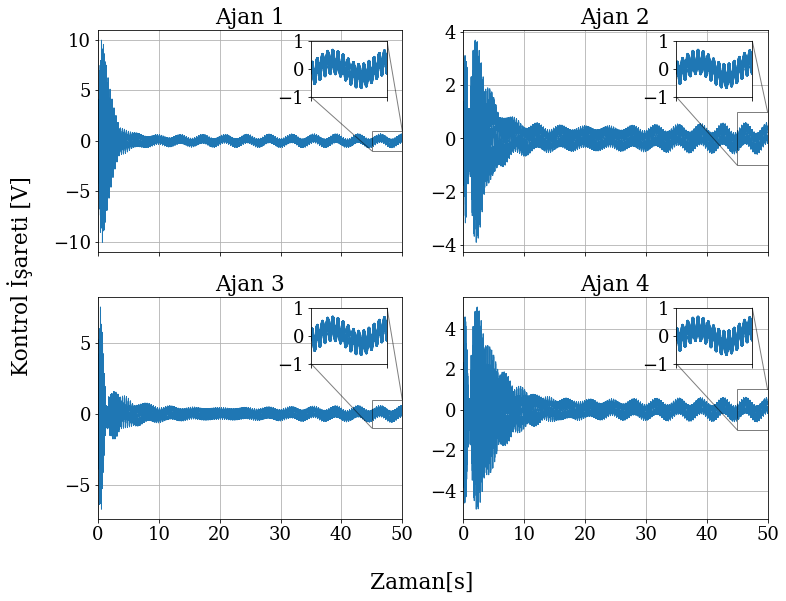

In [16]:
time = eng.workspace['time'];

control1 =  np.asarray(eng.workspace['control1'])
control2 =  np.asarray(eng.workspace['control2'])
control3 =  np.asarray(eng.workspace['control3'])
control4 =  np.asarray(eng.workspace['control4'])

time = np.linspace(0 , time[-1], control4.size);
plt.rc("axes", prop_cycle=standard_cycler);
plt.rc('figure', figsize=(12, 9));
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
fig.supxlabel("Zaman[s]");
fig.supylabel("Kontrol İşareti [V]");

axs[0,0].plot(time, control1, label='Denetleyici Kapalı', linewidth=1);
axs[0,0].grid();
axs[0,0].set_xlim(time[0], time[-1]);
axs[0,0].set_title('Ajan 1')

axins1 = axs[0,0].inset_axes([0.7, 0.7, 0.25, 0.25])
axins1.plot(time, control1)
axins1.set_xlim(45, 50)
axins1.set_ylim(-1, 1)
axins1.set_xticklabels([])
axs[0,0].indicate_inset_zoom(axins1, edgecolor="black")

axs[0,1].plot(time, control2, label='Denetleyici Kapalı', linewidth=1);
axs[0,1].grid();
axs[0,1].set_xlim(time[0], time[-1]);
axs[0,1].set_title('Ajan 2')

axins2 = axs[0,1].inset_axes([0.7, 0.7, 0.25, 0.25])
axins2.plot(time, control1)
axins2.set_xlim(45, 50)
axins2.set_ylim(-1, 1)
axins2.set_xticklabels([])
axs[0,1].indicate_inset_zoom(axins2, edgecolor="black")

axs[1,0].plot(time, control3, label='Denetleyici Kapalı', linewidth=1);
axs[1,0].grid();
axs[1,0].set_xlim(time[0], time[-1]);
axs[1,0].set_title('Ajan 3')

axins3 = axs[1,0].inset_axes([0.7, 0.7, 0.25, 0.25])
axins3.plot(time, control1)
axins3.set_xlim(45, 50)
axins3.set_ylim(-1, 1)
axins3.set_xticklabels([])
axs[1, 0].indicate_inset_zoom(axins3, edgecolor="black")

axs[1,1].plot(time.reshape(time.size), control4.reshape(control4.size), label='Denetleyici Kapalı', linewidth=1);
axs[1,1].grid();
axs[1,1].set_xlim(time[0], time[-1]);
axs[1,1].set_title('Ajan 4')

axins4 = axs[1,1].inset_axes([0.7, 0.7, 0.25, 0.25])
axins4.plot(time, control1)
axins4.set_xlim(45, 50)
axins4.set_ylim(-1, 1)
axins4.set_xticklabels([])
axs[1, 1].indicate_inset_zoom(axins4, edgecolor="black")

plt.savefig('control-input-neigh.pdf')
